# Webscraping & Analysis on DOMimmo Martinique

In [1]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np

In [2]:
# Regroup all urls pages from DOM
urls = ["https://www.domimmo.com/martinique/vente/"]
for page_num in range(2, 68):
    urls.append("https://www.domimmo.com/martinique/vente/" + "page/" + str(page_num)+ "/")

# Make list of get requests
response99 = []
for url in urls :  
    response99.append(rq.get(url))

# Make a list of beautiful Soup's content 
soup99 = []
for resp in response99 : 
    soup99.append(BeautifulSoup(resp.content, "html5lib"))

In [3]:
# Identify the HTML TAGS of cell's houses and make a list 
html_cells = []

for sp in soup99 :  
    html_cells.append(sp.find_all(name = 'li', class_="list__ul__li"))

# let's print HTML TAGS of ONE cell to see important information about a sell 
ok = html_cells[0][0]
print(ok)

<li class="list__ul__li"><div class="list__ul__li__tools tool"><span class="list__ul__li__tools__date">30/01/23</span><a class="list__ul__li__tools__heart tool__heart" id="tool-heart-231301889368191"><img class="list__ul__li__tools__heart__img" height="20" src="/assets/img/cmn/blank-1x1.png" width="20"/></a></div><a class="list__ul__li__a" href="/martinique/immobilier/231301889368191/"><div class="list__ul__li__a__logo"><img alt="Appartement T2 avec jardin privatif" class="list__ul__li__a__logo__img" height="90" loading="lazy" src="https://keldom.blob.core.windows.net/domimmo/an/photos/120/231301854685704.jpg" width="120"/></div><div class="list__ul__li__a__txt"><div class="list__ul__li__a__txt__catreg"><div class="list__ul__li__a__txt__catreg__1"><span class="list__ul__li__a__txt__catreg__1__cat">Vente</span> <span class="list__ul__li__a__txt__catreg__1__type">Appartement</span></div><div class="list__ul__li__a__txt__catreg__2"><span class="list__ul__li__a__txt__catreg__2__cp">97224</

In [4]:
# Creates the lists of informations thanks to the HTML TAGS
desc = []
price = []
info = []
ville = []
adress = []
Type = []
link = []
date_annonce = []

for page in html_cells :
    for div in page :
        
        # table date mise en ligne
        date = re.sub('[^0-9/.xa]','', div.find_all(name = 'span', class_='list__ul__li__tools__date')[0].text)
        date_annonce.append(date)
        
        # table lien de vente 
        lien = 'https://www.domimmo.com' + div.find_all(name = 'a', class_='list__ul__li__a')[0]['href']
        link.append(lien)
        
        # table type de vente
        Type.append(div.find_all(name = 'span', class_="list__ul__li__a__txt__catreg__1__type")[0].text)
        
        # table adress
        adress.append(div.find_all(name = 'span', class_="list__ul__li__a__txt__catreg__2__cp")[0].text)
        
        # table ville
        ville.append(div.find_all(name = 'span', class_="list__ul__li__a__txt__catreg__2__ville")[0].text)
        
        # table description
        desc.append(div.find_all(name = 'div', class_="list__ul__li__a__txt__ti")[0].text)
        
        # table price
        prix = re.sub('[^0-9\.xa]','', div.find_all(name = 'div', class_="list__ul__li__a__txt__prix")[0].text)
        price.append(prix)
        
        # table info 
        info.append(div.find_all(name = 'div', class_="list__ul__li__a__txt__prop")[0].text.split('-'))

In [5]:
# dictionary of lists 
dict = {'City': ville, 'Address' : adress, 'Type':Type, 'Description':desc, 
        'Price (en €)':price, 'Publishing Date': date_annonce,'Info':info, 'Link' :link}

df = pd.DataFrame(dict)
pd.options.display.max_colwidth = 500
df

,City,Address,Type,Description,Price (en €),Publishing Date,Info,Link
0,Ducos,97224,Appartement,Appartement T2 avec jardin privatif,130000,30/01/23,"[2 pièces , 1 chambre , 49 m²]",https://www.domimmo.com/martinique/immobilier/231301889368191/
1,Le Diamant,97223,Appartement,Studio neuf avec terrasse pour investir au Diamant,189000,30/01/23,"[1 pièce , 26,61 m²]",https://www.domimmo.com/martinique/immobilier/231304297649327/
2,Sainte Luce,97228,Fonds de commerce,Fond de commerce Restaurant N°1 martinique,199000,30/01/23,[112 m²],https://www.domimmo.com/martinique/immobilier/231304156643292/
3,Saint Esprit,97270,Maison / Villa,Vente Maison de ville 3 pièces,210000,30/01/23,"[3 pièces , 2 chambres , 92 m²]",https://www.domimmo.com/martinique/immobilier/231304181145456/
4,Le Lamentin,97232,Appartement,Vente Appartement 2 pièces,139000,30/01/23,"[2 pièces , 1 chambre , 58 m²]",https://www.domimmo.com/martinique/immobilier/231304181144475/
...,...,...,...,...,...,...,...,...
1998,Rivière Salée,97215,Terrain,TERRAIN PLAT NU CONSTRUCTIBLE,477000,30/10/22,[7 448 m²],https://www.domimmo.com/martinique/immobilier/141121127076652/
1999,Le Vauclin,97280,Appartement,Le VAUCLIN - MACABOU - Appartement T4 Mezzanine 160 000 euro,160000,30/10/22,"[4 pièces , 3 chambres , 70 m²]",https://www.domimmo.com/martinique/immobilier/141014153890966/
2000,Fort de France,97200,Maison / Villa,"Jolie VILLA F4 (non meublée), sur un TERRAIN clôturé d'envir",410000,30/10/22,"[4 pièces , 3 chambres , 150 m²]",https://www.domimmo.com/martinique/immobilier/131024204635878/
2001,Sainte Anne,97227,Maison / Villa,Ste ANNE - BELFOND - STUDIO TYPE MAISONNETTE - AVEC PARKING,118800,30/10/22,"[1 pièce , 1 chambre , 15 m²]",https://www.domimmo.com/martinique/immobilier/121211133276815/


# Data Wrangling

In [6]:
nb_piece = df['Info']
nb_piece = nb_piece.apply(lambda x: list(filter(lambda elem: 'pièce' in elem,x)))
nb_piece = nb_piece.apply(lambda x: " ".join(x))
nb_piece = nb_piece.str.replace('[\.pièces]', '', regex = True)
nb_piece = nb_piece.replace('',np.nan)
nb_piece.head(10)

0    2  
1    1  
2    NaN
3    3  
4    2  
5    6  
6    3  
7    2  
8    NaN
9    3  
Name: Info, dtype: object

In [7]:
nb_room = df['Info']
nb_room = nb_room.apply(lambda x: list(filter(lambda elem: 'chambres' in elem,x)))
nb_room = nb_room.apply(lambda x: " ".join(x))
nb_room = nb_room.str.replace('[\.chambres]', '', regex = True)
nb_room = nb_room.replace('',np.nan)
nb_room.head(10)

0     NaN
1     NaN
2     NaN
3     2  
4     NaN
5     4  
6     2  
7     NaN
8     NaN
9     2  
Name: Info, dtype: object

In [8]:
nb_m2 = df['Info']
nb_m2 = nb_m2.apply(lambda x: list(filter(lambda elem: 'm²' in elem,x)))
nb_m2 = nb_m2.apply(lambda x: " ".join(x))
nb_m2 = nb_m2.str.replace('[\.m²]', '', regex = True)
nb_m2 = nb_m2.replace('',np.nan)
nb_m2.head(10)

0        49 
1     26,61 
2       112 
3        92 
4        58 
5       138 
6        98 
7        41 
8       325 
9       880 
Name: Info, dtype: object

In [9]:
# dictionary of lists 
dict1 = {'City':ville, 'Address':adress, 'Type':Type, 'Description' : desc, 'Price (in €)':price, 
         'Publishing Date': date_annonce,'Number_Room':nb_piece, 'Number_Bedroom':nb_room, 
         'Surface (in m²)':nb_m2, 'Link' :link}
df1 = pd.DataFrame(dict1)

# cast price to int 
df1['Price (in €)'] = pd.to_numeric(df1['Price (in €)'], errors='coerce').fillna(0)
df1['Price (in €)'] = df1['Price (in €)'].astype('int')

# cast Number_Room to int 
df1['Number_Room'] = pd.to_numeric(df1['Number_Room'], errors='coerce').fillna(0)
df1['Number_Room'] = df1['Number_Room'].astype('int')

# cast Number_Bedroom to int 
df1['Number_Bedroom'] = pd.to_numeric(df1['Number_Bedroom'], errors='coerce').fillna(0)
df1['Number_Bedroom'] = df1['Number_Bedroom'].astype('int')

# cast Surface (in m²) to float
df1['Surface (in m²)'] = pd.to_numeric(df1['Surface (in m²)'], errors='coerce').fillna(0)
df1['Surface (in m²)'] = df1['Surface (in m²)'].astype('float')

df1

,City,Address,Type,Description,Price (in €),Publishing Date,Number_Room,Number_Bedroom,Surface (in m²),Link
0,Ducos,97224,Appartement,Appartement T2 avec jardin privatif,130000,30/01/23,2,0,49.0,https://www.domimmo.com/martinique/immobilier/231301889368191/
1,Le Diamant,97223,Appartement,Studio neuf avec terrasse pour investir au Diamant,189000,30/01/23,1,0,0.0,https://www.domimmo.com/martinique/immobilier/231304297649327/
2,Sainte Luce,97228,Fonds de commerce,Fond de commerce Restaurant N°1 martinique,199000,30/01/23,0,0,112.0,https://www.domimmo.com/martinique/immobilier/231304156643292/
3,Saint Esprit,97270,Maison / Villa,Vente Maison de ville 3 pièces,210000,30/01/23,3,2,92.0,https://www.domimmo.com/martinique/immobilier/231304181145456/
4,Le Lamentin,97232,Appartement,Vente Appartement 2 pièces,139000,30/01/23,2,0,58.0,https://www.domimmo.com/martinique/immobilier/231304181144475/
...,...,...,...,...,...,...,...,...,...,...
1998,Rivière Salée,97215,Terrain,TERRAIN PLAT NU CONSTRUCTIBLE,477000,30/10/22,0,0,0.0,https://www.domimmo.com/martinique/immobilier/141121127076652/
1999,Le Vauclin,97280,Appartement,Le VAUCLIN - MACABOU - Appartement T4 Mezzanine 160 000 euro,160000,30/10/22,4,3,70.0,https://www.domimmo.com/martinique/immobilier/141014153890966/
2000,Fort de France,97200,Maison / Villa,"Jolie VILLA F4 (non meublée), sur un TERRAIN clôturé d'envir",410000,30/10/22,4,3,150.0,https://www.domimmo.com/martinique/immobilier/131024204635878/
2001,Sainte Anne,97227,Maison / Villa,Ste ANNE - BELFOND - STUDIO TYPE MAISONNETTE - AVEC PARKING,118800,30/10/22,1,0,15.0,https://www.domimmo.com/martinique/immobilier/121211133276815/


# Data Visualization using Folium

In [11]:
from geopy.geocoders import Nominatim

# Initialize the geolocator
geolocator = Nominatim(user_agent="geoapiExerciser")

# Create an empty list to store the locations
locations = []

count_by_city = df1.groupby('City').size().reset_index(name='counts')

# Iterate through each city in your list
for city in count_by_city.City :
    # Get the location for the city
    location = geolocator.geocode((city + ', Martinique'))
    # Append the location to the list
    locations.append((city, location.latitude, location.longitude))

### 1. DF of the Count of property sale per City 

In [12]:
# create location dataframe
df_locations = pd.DataFrame(locations, columns=['City', 'Latitude', 'Longitude'])

# merge the location dataframe with the count_by_city dataframe on the 'City' column
df_merged = count_by_city.merge(df_locations, on='City')
df_merged.sort_values(by='counts', ascending=False, inplace=True)
df_merged.head(10)

,City,counts,Latitude,Longitude
5,Fort de France,601,14.602796,-61.067672
12,Le Lamentin,198,14.614557,-61.001815
22,Les Trois Ilets,134,14.538767,-61.033545
10,Le Diamant,104,14.481489,-61.020198
31,Schoelcher,99,14.616945,-61.100456
3,Ducos,86,14.574325,-60.971901
8,La Trinité,84,14.755316,-61.028723
19,Le Robert,67,14.677614,-60.939021
20,Le Vauclin,64,14.545294,-60.839893
29,Sainte Luce,58,14.468281,-60.921480


### 2. Map of the Count of property sale per City

In [13]:
import folium
from branca.colormap import linear

# Start location is MARTINIQUE
martinique_coordinate = [14.641528, -61.024174]
map = folium.Map(location = martinique_coordinate, zoom_start=10)

occurences = folium.map.FeatureGroup()
n_mean = df_merged['counts'].mean()

for lat, long, number, city in zip(df_merged['Latitude'],
                                   df_merged['Longitude'],
                                   df_merged['counts'],
                                   df_merged['City'], ):
    occurences.add_child(
    folium.vector_layers.CircleMarker( [lat, long],
                                       radius = number/n_mean*5, # define how big you want the circle markers to be
                                       color='red',
                                       fill=True,
                                       fill_color='blue',
                                       fill_opacity=0.4,
                                       tooltip = str(city) +', '+ str(number)
                                     )
    )

map.add_child(occurences)

- Most of property sale are located in South of the islands and near coast. 
- Especially in South-West, on the side of the carribean sea where Fort-de-France has the most property sales.

### 3. DF of Mean Price (in €) per City

In [14]:
mean_price_by_city = df1.groupby(['City'])['Price (in €)'].mean().round().reset_index(name='Mean Price')
mean_price_by_city = mean_price_by_city.merge(df_locations, on='City')
mean_price_by_city.head(10)

,City,Mean Price,Latitude,Longitude
0,Basse Pointe,173531.0,14.868227,-61.113506
1,Bellefontaine,578857.0,14.672853,-61.163350
2,Case Pilote,550004.0,14.644133,-61.137336
3,Ducos,277194.0,14.574325,-60.971901
4,Fonds Saint Denis,150000.0,14.718688,-61.107875
5,Fort de France,318842.0,14.602796,-61.067672
6,Gros Morne,192508.0,14.709959,-61.006011
7,L'Ajoupa Bouillon,226194.0,14.824285,-61.113732
8,La Trinité,337906.0,14.755316,-61.028723
9,Le Carbet,409338.0,14.712206,-61.183433


### 4. Map of Mean Price (in €) of property sale per City

In [15]:
# Start location is MARTINIQUE
martinique_coordinate = [14.641528, -61.024174]
map = folium.Map(location = martinique_coordinate, zoom_start=10)

occurences = folium.map.FeatureGroup()
total_mean = mean_price_by_city['Mean Price'].mean()

for lat, long, mean_p, city in zip(mean_price_by_city['Latitude'],
                                   mean_price_by_city['Longitude'],
                                   mean_price_by_city['Mean Price'],
                                   mean_price_by_city['City'], ):
    occurences.add_child(
    folium.vector_layers.CircleMarker( [lat, long],
                                       radius = mean_p/total_mean*5, # define how big you want the circle markers to be
                                       color='blue',
                                       fill=True,
                                       fill_color='green',
                                       fill_opacity=0.4,
                                       tooltip = str(city) +', avg price = '+ str(mean_p) + '€'
                                     )
    )

map.add_child(occurences)

- Property sale that are located on South-West of the island on the carrabean sea costs almost 1M €.
- The lowest average price for the sale of a property is located inland.
- The average price of a property sale is increasing wheter we are near a coast (Atlantic Ocean or Carrabean Sea) or not.
- Fort-de-France, the 'chef-lieu' of Martinique has a low avg price around 300k €.

# Data Analysis

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

### 1. General Dataframe DF2 Total 

In [17]:
df2 = df1.merge(df_locations, on='City')


# Reorder the columns
df2 = df2.reindex(columns = ['Publishing Date', 'City','Address','Type','Description','Price (in €)',
                             'Number_Room','Number_Bedroom','Surface (in m²)',
                             'Latitude','Longitude','Link'])
df2.head(5)

,Publishing Date,City,Address,Type,Description,Price (in €),Number_Room,Number_Bedroom,Surface (in m²),Latitude,Longitude,Link
0,30/01/23,Ducos,97224,Appartement,Appartement T2 avec jardin privatif,130000,2,0,49.0,14.574325,-60.971901,https://www.domimmo.com/martinique/immobilier/231301889368191/
1,25/01/23,Ducos,97224,Appartement,APPARTEMENT T2,141050,2,0,39.0,14.574325,-60.971901,https://www.domimmo.com/martinique/immobilier/231254282474641/
2,21/01/23,Ducos,97224,Terrain,TERRAIN DE 3 276M²,145000,0,0,0.0,14.574325,-60.971901,https://www.domimmo.com/martinique/immobilier/231214432705185/
3,21/01/23,Ducos,97224,Terrain,TERRAIN DE 2 500M²,145000,0,0,0.0,14.574325,-60.971901,https://www.domimmo.com/martinique/immobilier/231214432705182/
4,14/01/23,Ducos,97224,Terrain,Terrain constructible plat à Fond savane,320000,0,0,0.0,14.574325,-60.971901,https://www.domimmo.com/martinique/immobilier/231144153782876/


In [18]:
df2.describe().round(1)

,Price (in €),Number_Room,Number_Bedroom,Surface (in m²),Latitude,Longitude
count,2003.0,2003.0,2003.0,2003.0,2003.0,2003.0
mean,348409.1,3.2,1.8,137.6,14.6,-61.0
std,320513.9,3.3,2.3,225.5,0.1,0.1
min,0.0,0.0,0.0,0.0,14.4,-61.2
25%,150000.0,0.0,0.0,0.0,14.5,-61.1
50%,244950.0,3.0,0.0,62.0,14.6,-61.0
75%,449625.0,4.0,3.0,160.0,14.6,-61.0
max,3859800.0,36.0,14.0,2500.0,14.9,-60.8


In [19]:
df2.Type.value_counts()

Appartement          701
Maison / Villa       614
Terrain              344
Immeuble             167
Local commercial      93
Fonds de commerce     48
Bureaux               21
Dépôt / Entrepôt       7
Parking                5
Divers                 2
Gîte rural             1
Name: Type, dtype: int64

In [20]:
# Streamlit
df2.to_csv('Webscraping_DOMimmo_2.csv',index=False)

### 2. Analysis Dataframe by Type : 'Appartement' (DF3)

In [21]:
# DATAFRAME BY TYPE OF Appartement
df3 = df2[df2.Type == 'Appartement']

print(df3.shape)
df3.head(5)

(701, 12)


,Publishing Date,City,Address,Type,Description,Price (in €),Number_Room,Number_Bedroom,Surface (in m²),Latitude,Longitude,Link
0,30/01/23,Ducos,97224,Appartement,Appartement T2 avec jardin privatif,130000,2,0,49.0,14.574325,-60.971901,https://www.domimmo.com/martinique/immobilier/231301889368191/
1,25/01/23,Ducos,97224,Appartement,APPARTEMENT T2,141050,2,0,39.0,14.574325,-60.971901,https://www.domimmo.com/martinique/immobilier/231254282474641/
5,12/01/23,Ducos,97224,Appartement,"BEL APPARTEMENT T3 SUR LES HAUTEURS, BEL VUE MER",203300,3,2,70.0,14.574325,-60.971901,https://www.domimmo.com/martinique/immobilier/231121515395543/
8,11/01/23,Ducos,97224,Appartement,T2 au dernier étage d'une résidence récente,123000,2,0,0.0,14.574325,-60.971901,https://www.domimmo.com/martinique/immobilier/231114199258601/
9,09/01/23,Ducos,97224,Appartement,Bel F3 en RDC dans résidence calme,198000,3,2,0.0,14.574325,-60.971901,https://www.domimmo.com/martinique/immobilier/231921397307726/


In [22]:
#df3.to_csv('Webscraping_DOMimmo_3.csv')

In [23]:
# Mean price by city to map it 
mean_app_by_city = df3.groupby(['City'])['Price (in €)'].mean().round().reset_index(name='Mean Price')
df_app_map = pd.merge(df3, mean_app_by_city, on='City')

# df to use only for the folium map 
df_app_map = df_app_map.reindex(columns = ['City','Mean Price','Latitude','Longitude'])

In [24]:
# Start location is MARTINIQUE
martinique_coordinate = [14.641528, -61.024174]
map = folium.Map(location = martinique_coordinate, zoom_start=10)

occurences = folium.map.FeatureGroup()
total_mean = df_app_map['Mean Price'].mean()

for lat, long, mean_p, city in zip(df_app_map['Latitude'],
                                   df_app_map['Longitude'],
                                   df_app_map['Mean Price'],
                                   df_app_map['City'], ):
    occurences.add_child(
    folium.vector_layers.CircleMarker( [lat, long],
                                       radius = mean_p/total_mean*5, # define how big you want the circle markers to be
                                       color='blue',
                                       fill=True,
                                       fill_color='green',
                                       fill_opacity=0.4,
                                       tooltip = str(city) +', avg price = '+ str(mean_p) + '€'
                                     )
    )

map.add_child(occurences)

### 3. Heatmap of Corrolated Dataframe of Appartement 

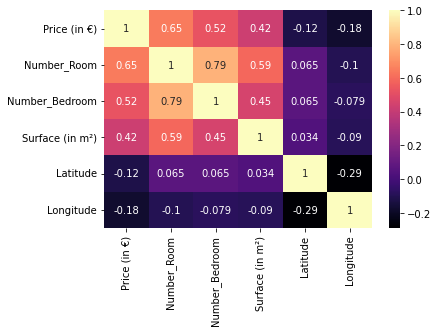

In [29]:
# Heatmap to find relations between variables in a dataset. 
sns.heatmap(df3.corr(numeric_only = True), annot = True, cmap = 'magma')
plt.show()

### 4. Regplot & Barplot of differents variable vs average price

We use Scatter plot to observe linear relations between two variables in a dataset. 
In our case, the ‘SalePrice’ attribute is the dependent variable, and every other are the independent variables.

In [30]:
# Mean price by room 
apt_mean_price_by_room = df3.groupby(['Number_Room'])['Price (in €)'].mean().round().reset_index(name='Mean Price Room')

# Mean price by bedroom
apt_mean_price_by_bedroom = df3.groupby(['Number_Bedroom'])['Price (in €)'].mean().round().reset_index(name='Mean Price Bedroom')

# Mean price by bedroom
apt_mean_price_by_surface = df3.groupby(['Surface (in m²)'])['Price (in €)'].mean().round().reset_index(name='Mean Price Surface')

# Mean price by city
apt_mean_price_by_city = df3.groupby(['City'])['Price (in €)'].mean().round().reset_index(name='Mean Price City')

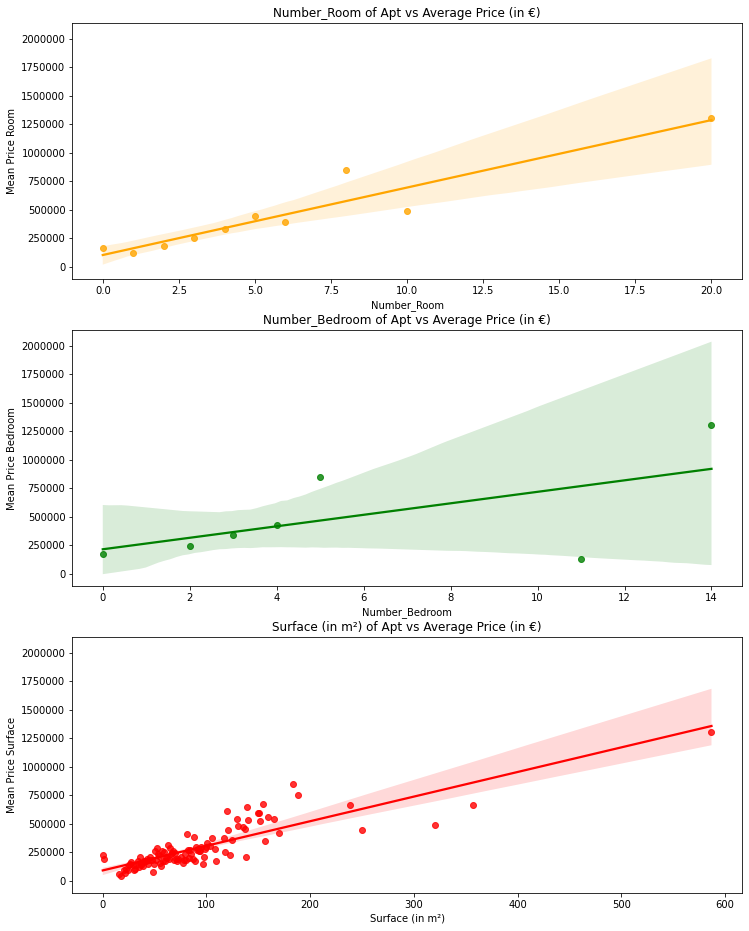

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(12,16), sharey=True)

sns.regplot(ax=axes[0], x = 'Number_Room', y = 'Mean Price Room', data = apt_mean_price_by_room, color = 'orange')
axes[0].set_title('Number_Room of Apt vs Average Price (in €)')

sns.regplot(ax=axes[1], x = 'Number_Bedroom', y ='Mean Price Bedroom', data = apt_mean_price_by_bedroom, color = 'green')
axes[1].set_title('Number_Bedroom of Apt vs Average Price (in €)')

sns.regplot(ax=axes[2], x = 'Surface (in m²)', y ='Mean Price Surface', data = apt_mean_price_by_surface, color = 'red')
axes[2].set_title('Surface (in m²) of Apt vs Average Price (in €)')
 
# Format y-axis tick labels as integers
plt.ticklabel_format(style='plain', axis='y')

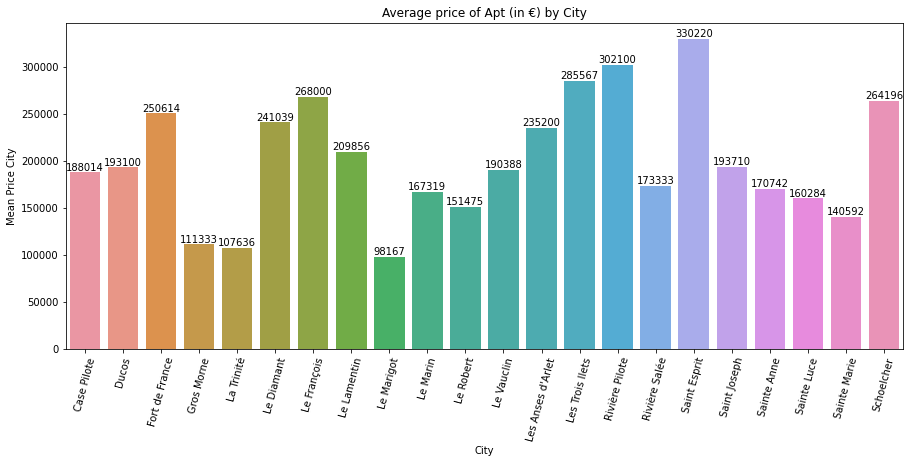

In [32]:
plt.figure(figsize=(15,6))

ax = sns.barplot(x = 'City', y = 'Mean Price City', data = apt_mean_price_by_city)
ax.bar_label(ax.containers[0])
plt.title('Average price of Apt (in €) by City')

# Format x-axis tick labels as integers
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=75)
plt.show()

In [82]:
import plotly.express as px

#colors = ['lightslategray',] * len(apt_mean_price_by_city)
#max_price_idx = apt_mean_price_by_city['Mean Price City'].idxmax()
#colors[max_price_idx] = 'crimson'

#fig = px.bar(apt_mean_price_by_city, y='Mean Price City', x='City', text_auto='.2s',
            #title='Average price of Apt (in €) by City', color = colors)
#fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
#fig.show()

In [83]:
df1['City'].unique()

array(['Ducos', 'Le Diamant', 'Sainte Luce', 'Saint Esprit',
       'Le Lamentin', 'Le Morne Rouge', 'Fort de France', 'Le François',
       'Le Robert', 'La Trinité', 'Le Vauclin', 'Le Marin',
       'Rivière Salée', 'Case Pilote', 'Saint Joseph', 'Les Trois Ilets',
       'Schoelcher', 'Sainte Marie', 'Le Marigot', 'Sainte Anne',
       'Gros Morne', "Les Anses d'Arlet", 'Saint Pierre', 'Le Carbet',
       'Bellefontaine', 'Basse Pointe', 'Rivière Pilote', 'Le Lorrain',
       'Le Morne Vert', "L'Ajoupa Bouillon", 'Le Prêcheur',
       'Fonds Saint Denis'], dtype=object)

### 5. Webscrape new page for more info

In [84]:
def webscrap_list_link(list_link, name_tags, class_tags) :
    # Make list of get requests
    list_resp = []
    for url in list_link :  
        list_resp.append(rq.get(url))
        
    # Make a list of beautiful Soup's content 
    list_soup= []
    for response in list_resp: 
        list_soup.append(BeautifulSoup(response.content, "html5lib"))
    
    # Identify the HTML TAGS of cell's houses and make a list 
    list_html = []
    for soup in list_soup :  
        list_html.append(soup.find_all(name = name_tags, class_= class_tags))
    
    return list_html

In [85]:
# Make list of get requests
response90 = []
for url in df3['Link'] :  
    response90.append(rq.get(url))

In [86]:
# Make a list of beautiful Soup's content 
soup90 = []
for resp in response90 : 
    soup90.append(BeautifulSoup(resp.content, "html5lib"))

# Identify the HTML TAGS of cell's houses and make a list 
html_cells90 = []

for sp in soup90 :  
    html_cells90.append(sp.find_all(name = 'ul', class_="detail__in__photoprop__prop__ul"))

# let's print HTML TAGS of ONE cell to see important information about a sell 
ok = html_cells90[0][0]
print(ok)

<ul class="detail__in__photoprop__prop__ul"><li class="detail__in__photoprop__prop__ul__li"><label class="detail__in__photoprop__prop__ul__li__spanti"><b>Pièces</b></label> <span class="detail__in__photoprop__prop__ul__li__spanval"><b>2</b></span></li><li class="detail__in__photoprop__prop__ul__li"><label class="detail__in__photoprop__prop__ul__li__spanti"><b>Chambres</b></label> <span class="detail__in__photoprop__prop__ul__li__spanval"><b>1</b></span></li><li class="detail__in__photoprop__prop__ul__li"><label class="detail__in__photoprop__prop__ul__li__spanti">Salles d'eau</label> <span class="detail__in__photoprop__prop__ul__li__spanval">1</span></li><li class="detail__in__photoprop__prop__ul__li"><label class="detail__in__photoprop__prop__ul__li__spanti">Toilettes</label> <span class="detail__in__photoprop__prop__ul__li__spanval">1</span></li><li class="detail__in__photoprop__prop__ul__li"><label class="detail__in__photoprop__prop__ul__li__spanti"><b>Surface habitable</b></label> <

In [87]:
# Creation of df_apt_scrap
data99 = []

for page in html_cells90[:800] :
    for li in page :
          
        #print(li)
        item = {}
        for label, span in zip(li.find_all('label'), li.find_all('span')):
            span_text = span.text.strip() if span else None
            label_text = label.text.strip()    
            item[label_text] = span_text
        data99.append(item)
        
df_apt_scrap = pd.DataFrame(data99)

### 6. Data pre-processing and selection

In [88]:
# Transform the NaN values into 0 and drop columns
df_apt_scrap1 = df_apt_scrap.fillna(0)
df_apt_scrap1 = df_apt_scrap1.drop(['Pièces','Surface habitable','Référence', 'Publication', 'Chambres'], axis=1)

# Delete m², € and spaces from numbers 
cols = ['Surface séjour', 'Surface terrasse', 'Surface totale', 'Surface terrain', 'Taxe foncière', 'Taxe habitation']
df_apt_scrap1[cols] = df_apt_scrap1[cols].replace('[\.m²€]','',regex = True)
df_apt_scrap1[cols] = df_apt_scrap1[cols].replace(r'\s', '', regex=True)

# Cast to numeric then int 
cols_int = ['Etage', "Nbre d'étages", "Salles d'eau", 'Toilettes', 'Salles de bain']
df_apt_scrap1[cols_int] = df_apt_scrap1[cols_int].apply(pd.to_numeric).fillna(0)

# Cast to numeric then float
cols_float = ['Surface séjour', 'Surface terrasse', 'Surface totale', 'Surface terrain', 'Taxe foncière', 'Taxe habitation']
df_apt_scrap1[cols_float] = df_apt_scrap1[cols_float].apply(pd.to_numeric, errors='coerce', downcast='float').fillna(0)

In [89]:
# Streamlit 
df_apt_processed_streamlit = pd.merge(df3, df_apt_scrap1, left_index=True, right_index=True)
df_apt_processed_streamlit.to_csv('Webscraping_DOMimmo_4.csv', index=False)

In [93]:
# Load df of all real estate sales
test_df = pd.read_csv('Webscraping_DOMimmo_4.csv')

In [96]:
test_df.City.unique()

array(['Ducos', 'Le Diamant', 'Sainte Luce', 'Saint Esprit',
       'Le Lamentin', 'Fort de France', 'Le François', 'Le Robert',
       'La Trinité', 'Le Vauclin', 'Le Marin', 'Rivière Salée',
       'Case Pilote', 'Saint Joseph', 'Les Trois Ilets', 'Schoelcher',
       'Sainte Marie', 'Le Marigot', 'Sainte Anne', 'Gros Morne',
       "Les Anses d'Arlet", 'Rivière Pilote'], dtype=object)

In [90]:
# Perform one hot encoding to convert categorical variables to binary variables.
df_apt_scrap1 = pd.get_dummies(data = df_apt_scrap1, columns = ['Environnement', 'Vue', 'Exposition']) 
# Dataframe of apt from the link cleaned and processed
df_apt_scrap1.head(5)

,Salles d'eau,Toilettes,Surface séjour,Surface terrasse,Etage,Nbre d'étages,Salles de bain,Surface totale,Taxe foncière,Surface terrain,...,Vue_Ville,Exposition_0,Exposition_E,Exposition_N,Exposition_NE,Exposition_NO,Exposition_O,Exposition_S,Exposition_SE,Exposition_SO
0,1,1,0.0,0.0,2,4,0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0.0,0.0,2,0,1,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0.0,0.0,4,5,0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,0.0,0.0,6,6,0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,0.0,0.0,0,3,0,0.0,970.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
df3.reset_index(drop=True, inplace=True)
df_apt_processed = pd.merge(df3, df_apt_scrap1, left_index=True, right_index=True)
df_apt_processed.columns

Index(['Publishing Date', 'City', 'Address', 'Type', 'Description',
       'Price (in €)', 'Number_Room', 'Number_Bedroom', 'Surface (in m²)',
       'Latitude', 'Longitude', 'Link', 'Salles d'eau', 'Toilettes',
       'Surface séjour', 'Surface terrasse', 'Etage', 'Nbre d'étages',
       'Salles de bain', 'Surface totale', 'Taxe foncière', 'Surface terrain',
       'Taxe habitation', 'Environnement_0', 'Environnement_Bord de mer',
       'Environnement_Bord de mer < 50 m', 'Environnement_Campagne',
       'Environnement_Résidentiel', 'Environnement_Urbain', 'Vue_0',
       'Vue_Autre', 'Vue_Campagne', 'Vue_Mer', 'Vue_Montagne', 'Vue_Ville',
       'Exposition_0', 'Exposition_E', 'Exposition_N', 'Exposition_NE',
       'Exposition_NO', 'Exposition_O', 'Exposition_S', 'Exposition_SE',
       'Exposition_SO'],
      dtype='object')

In [43]:
df_apt_processed.head(3)

,Publishing Date,City,Address,Type,Description,Price (in €),Number_Room,Number_Bedroom,Surface (in m²),Latitude,...,Vue_Ville,Exposition_0,Exposition_E,Exposition_N,Exposition_NE,Exposition_NO,Exposition_O,Exposition_S,Exposition_SE,Exposition_SO
0,30/01/23,Ducos,97224,Appartement,Appartement T2 avec jardin privatif,130000,2,0,49.0,14.574325,...,0,0,1,0,0,0,0,0,0,0
1,25/01/23,Ducos,97224,Appartement,APPARTEMENT T2,141050,2,0,39.0,14.574325,...,0,1,0,0,0,0,0,0,0,0
2,12/01/23,Ducos,97224,Appartement,"BEL APPARTEMENT T3 SUR LES HAUTEURS, BEL VUE MER",203300,3,2,70.0,14.574325,...,0,1,0,0,0,0,0,0,0,0


### 7. Creating Train Data and Test Data

it's important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['Number_Room', 'Number_Bedroom', 'Surface (in m²)', 'Latitude',
       'Longitude', 'Surface séjour', 'Etage', "Nbre d'étages",
       'Salles de bain', 'Toilettes', 'Surface terrasse', 'Surface totale',
       'Taxe foncière', 'Surface terrain', "Salles d'eau", 'Taxe habitation', 'Price (in €)']

df_apt_processed[num_vars] = scaler.fit_transform(df_apt_processed[num_vars])

In [45]:
from sklearn.model_selection import train_test_split

# Set our 'features' (x values) and our Y (target variable).
features = df_apt_processed.drop(['Publishing Date', 'City', 'Address', 'Type', 
                                  'Description', 'Price (in €)', 'Latitude', 'Longitude',
                                  'Link','Environnement_0', 'Vue_0','Exposition_0'], axis = 1) 
Y = df_apt_processed['Price (in €)']

x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.3, random_state=0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (490, 32) (490,)
Test set: (211, 32) (211,)


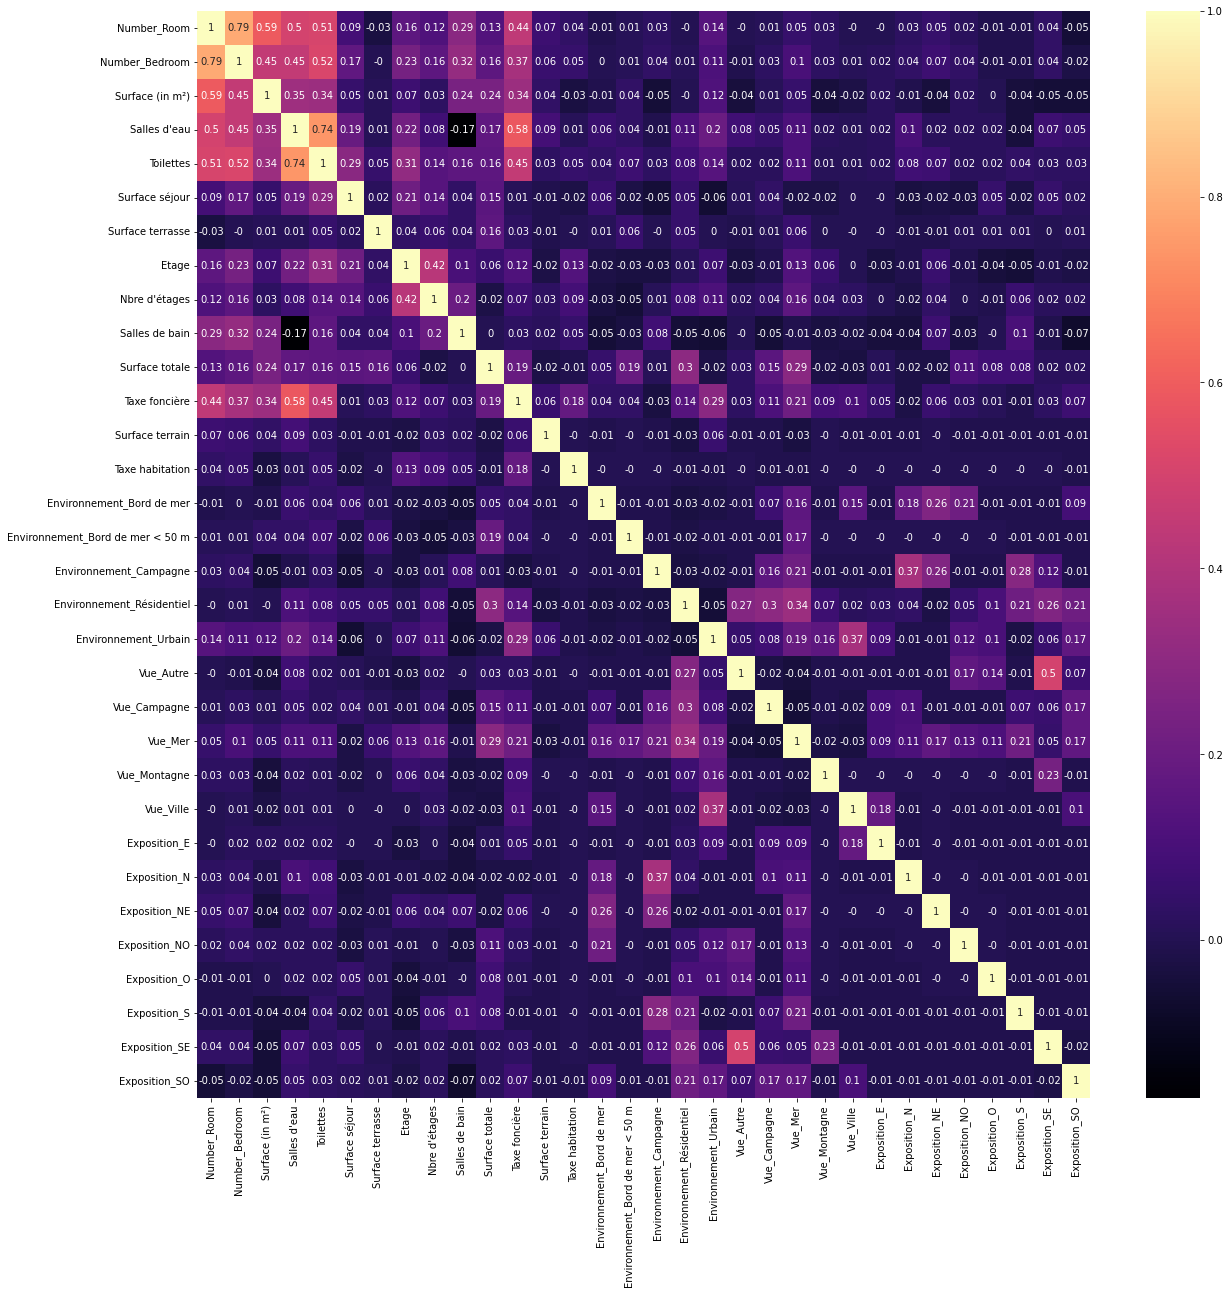

In [48]:
# Heatmap to find relations between variables in a dataset. 
fig = plt.figure(figsize=(20, 20))
sns.heatmap(round(features.corr(), 2), annot = True, cmap = 'magma')
plt.show()

### 8. Linear Regression model

It's a supervised machine learning in which the predicted output is continuous with having a constant slope. It is used to predict the values in a continuous range instead of classifying the values in the categories. 

In [ ]:
from sklearn.linear_model import LinearRegression

LinearReg = LinearRegression().fit(x_train, y_train)
LinearReg

In [ ]:
from sklearn.metrics import mean_squared_error

# Make prediction and print RMSE and R²
predictions = LinearReg.predict(x_test)

LinearRegression_RMSE = np.sqrt(mean_squared_error(y_test, predictions))
LinearRegression_R2 = LinearReg.score(x_test, y_test)

print('RMSE Linear :', LinearRegression_RMSE)
print('R2 Linear :', LinearRegression_R2)

In [ ]:
fig = plt.figure()
sns.regplot(x = y_test, y = predictions, data = df_apt_processed)
fig.suptitle('y_test vs y_pred')        
plt.xlabel('y_test')                          
plt.ylabel('y_pred') 
plt.show()

**Price** = intercept + **coeff0** * Number_Room + **coeff1** * Number_Bedroom + **coeff2** * Surface (in m²) + 
        **coeff3** * Surface séjour + **coeff4** * Etage + ...

In [ ]:
LinearReg.coef_

In [ ]:
LinearReg.intercept_

In [ ]:
#df_apt_processed[num_vars] = scaler.inverse_transform(df_apt_processed[num_vars])

### 9. OLS Regression model

In [ ]:
import statsmodels.api as sm
from statsmodels.api import OLS

ols = sm.OLS(y_train, x_train).fit()
#ols.summary()

pred = ols.predict(x_test)

OLSRegression_RMSE = np.sqrt(mean_squared_error(y_test, pred))
OLSRegression_R2 = ols.rsquared

print('RMSE OLS :', OLSRegression_RMSE)
print('R2 OLS :', OLSRegression_R2)

In [ ]:
from statsmodels.graphics.regressionplots import plot_partregress_grid

# Create a 3x5 subplot
fig, axs = plt.subplots(3, 5, figsize=(25, 15))

for i in range(15):
    # Plot the i-th figure on the i-th subplot
    sm.graphics.plot_fit(ols, i, ax=axs[i//5, i%5])

# Show the subplot
plt.show()

### 10.  SVR Regression Model 

In [ ]:
from sklearn.svm import SVR 

svr_lin  = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=1)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [ ]:
# Fit regression model
svr_lin.fit(x_train, y_train)
svr_poly.fit(x_train, y_train)
svr_rbf.fit(x_train, y_train)

pred_lin = svr_lin.predict(x_test)
pred_poly = svr_poly.predict(x_test)
pred_rbf = svr_rbf.predict(x_test)

svr_lin_RMSE = np.sqrt(mean_squared_error(y_test, pred_lin))
svr_lin_R2 = svr_lin.score(x_test, y_test)
print('RMSE SVM lin :', svr_lin_RMSE)
print('R2 SVM lin :', svr_lin_R2,'\n')

svr_poly_RMSE = np.sqrt(mean_squared_error(y_test, pred_poly))
svr_poly_R2 = svr_poly.score(x_test, y_test)
print('RMSE SVM poly :', svr_poly_RMSE)
print('R2 SVM poly :', svr_poly_R2,'\n')

svr_rbf_RMSE = np.sqrt(mean_squared_error(y_test, pred_rbf))
svr_rbf_R2 = svr_rbf.score(x_test, y_test)
print('RMSE SVM rbf :', svr_rbf_RMSE)
print('R2 SVM rbf :', svr_rbf_R2)

### 11. Random Forest Regresion Model 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_reg = RandomForestRegressor(n_estimators=300)
RF_reg.fit(x_train,y_train)

pred_RF = RF_reg.predict(x_test)

pred_RF_RMSE = np.sqrt(mean_squared_error(y_test, pred_RF))
pred_RF_R2 = RF_reg.score(x_test, y_test)

print('RMSE RF reg :', pred_RF_RMSE)
print('R2 RF reg :', pred_RF_R2)

# Results

In [ ]:
Model = ['Linear Regression', 'OLS Regression', 'SVM linear', 'SVM poly', 'SVM rbf', 'RF Regression']
Score = [LinearRegression_R2, OLSRegression_R2, svr_lin_R2, svr_poly_R2, svr_rbf_R2, pred_RF_R2]
RMSE = [LinearRegression_RMSE, OLSRegression_RMSE, svr_lin_RMSE, svr_poly_RMSE, svr_rbf_RMSE, pred_RF_RMSE]

df_models = pd.DataFrame({'Model':Model, 'R2_Score':Score, 'RMSE':RMSE})
df_models

In [ ]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10,6))

labs = (df_models['R2_Score']*100).round(1).astype('str') + '%'

ax = sns.barplot(x = 'Model', y = (df_models['R2_Score']*100).round(1), data = df_models)
ax.bar_label(ax.containers[0], labels = labs)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('R2 score of all Models')
plt.show()